In [41]:
# import the pandas module
# https://pandas.pydata.org/docs/user_guide/index.html

import pandas as pd

# numpy is a standard module for simple numerical calculations
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [42]:
data_frame = pd.read_csv("T40.1_States.txt",delimiter="\t")

We replace "Unreliable" by NaN.

In [43]:
data_frame=data_frame.replace("Unreliable",np.nan)
data_frame=data_frame.replace("Suppressed",np.nan)

In [44]:
CF19 = data_frame[(data_frame["Gender"] == "Female")& 
           (data_frame["Year"] == 2019.0) &
           (data_frame["Notes"] != "Total")]
CM19 = data_frame[(data_frame["Gender"] == "Male")& 
           (data_frame["Year"] == 2019.0) &
           (data_frame["Notes"] != "Total") ]
CF20 = data_frame[(data_frame["Gender"] == "Female")& 
           (data_frame["Year"] == 2020.0) &
           (data_frame["Notes"] != "Total")]
CM20 = data_frame[(data_frame["Gender"] == "Male")& 
           (data_frame["Year"] == 2020.0) &
           (data_frame["Notes"] != "Total")]

<BarContainer object of 51 artists>

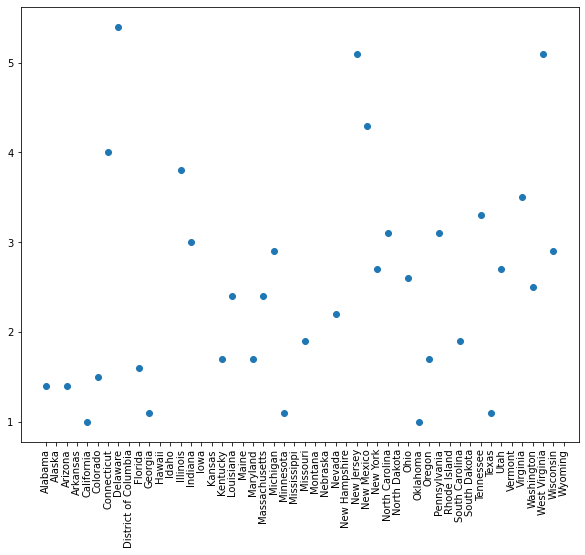

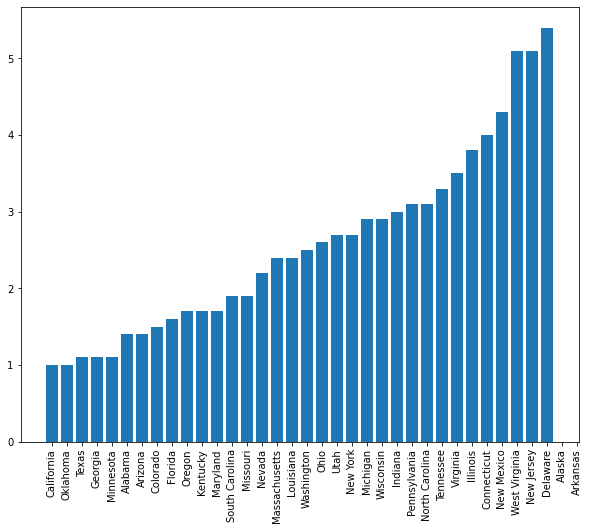

In [45]:
CF19b = CF19.sort_values(by=['Crude Rate'], ascending=True)
CF19b["Crude Rate"] = pd.to_numeric(CF19b["Crude Rate"], downcast="float")
CF19b = CF19b.sort_values(by=['Crude Rate'], ascending=True)

plt.figure(figsize=(10, 8))
plt.scatter(CF19["State"], CF19['Crude Rate'].astype(float))
plt.xticks(rotation=90)

plt.figure(figsize=(10, 8))
plt.xticks(rotation=90)
plt.bar(CF19b["State"], CF19b["Crude Rate"].astype(float))


<BarContainer object of 51 artists>

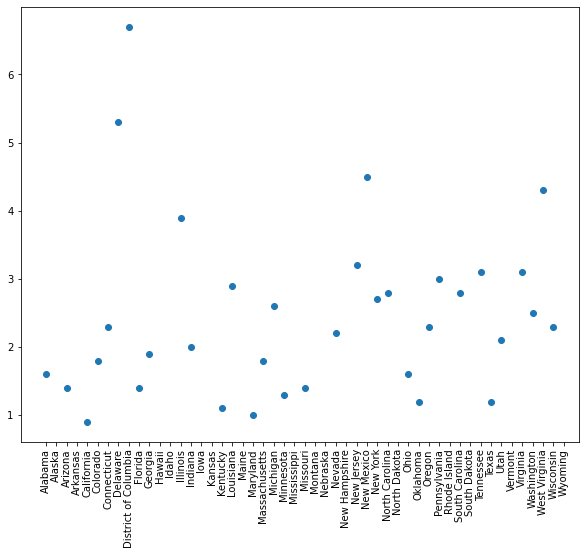

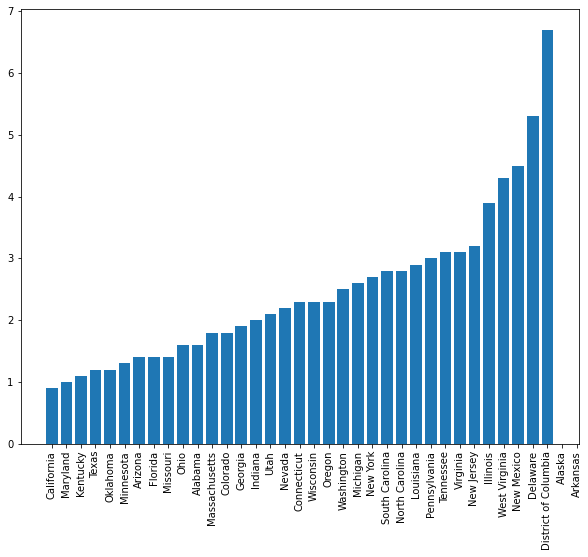

In [46]:
CF20b = CF20.sort_values(by=['Crude Rate'], ascending=True)
CF20b["Crude Rate"] = pd.to_numeric(CF20b["Crude Rate"], downcast="float")
CF20b = CF20b.sort_values(by=['Crude Rate'], ascending=True)

plt.figure(figsize=(10, 8))
plt.scatter(CF20["State"], CF20['Crude Rate'].astype(float))
plt.xticks(rotation=90)

plt.figure(figsize=(10, 8))
plt.xticks(rotation=90)
plt.bar(CF20b["State"], CF20b['Crude Rate'].astype(float))


<BarContainer object of 51 artists>

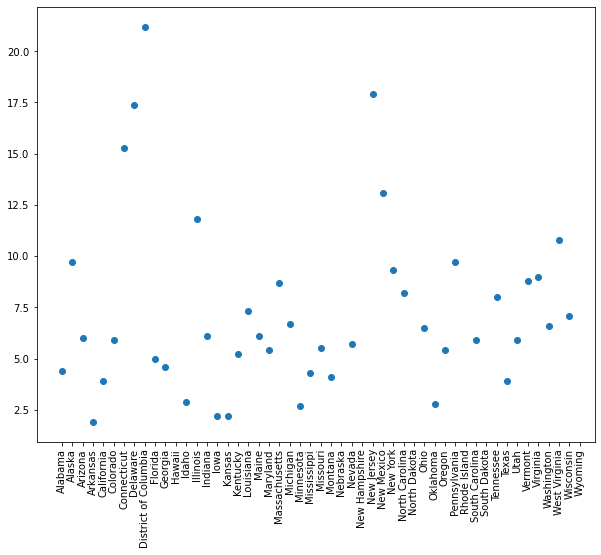

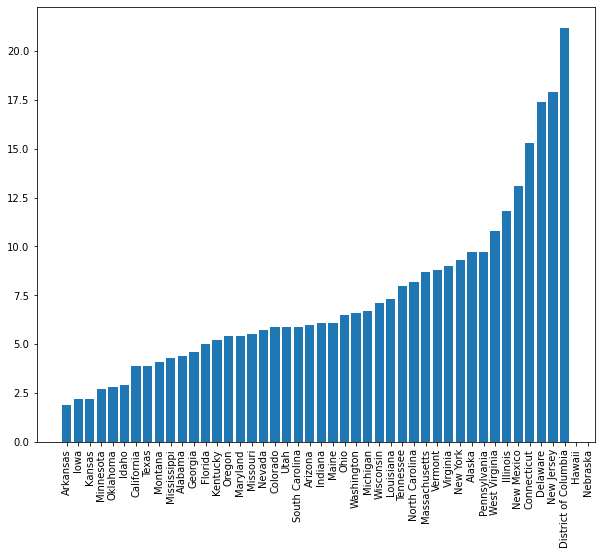

In [47]:
CM19b = CM19.sort_values(by=['Crude Rate'], ascending=True)
CM19b["Crude Rate"] = pd.to_numeric(CM19b["Crude Rate"], downcast="float")
CM19b = CM19b.sort_values(by=['Crude Rate'], ascending=True)

plt.figure(figsize=(10, 8))
plt.scatter(CM19["State"], CM19['Crude Rate'].astype(float))
plt.xticks(rotation=90)

plt.figure(figsize=(10, 8))
plt.xticks(rotation=90)
plt.bar(CM19b["State"], CM19b['Crude Rate'].astype(float))

<BarContainer object of 51 artists>

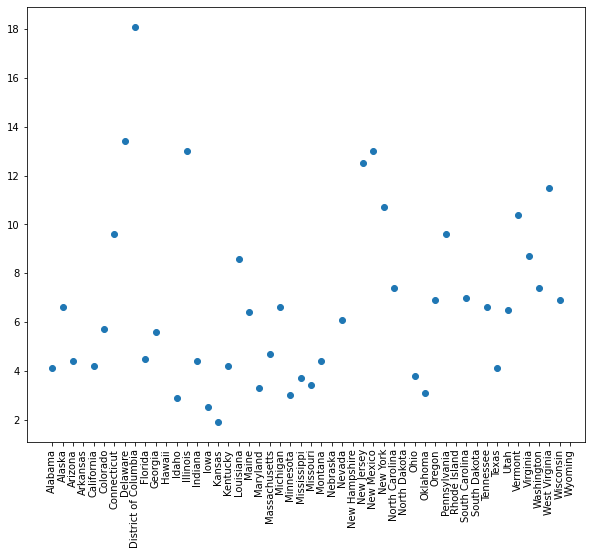

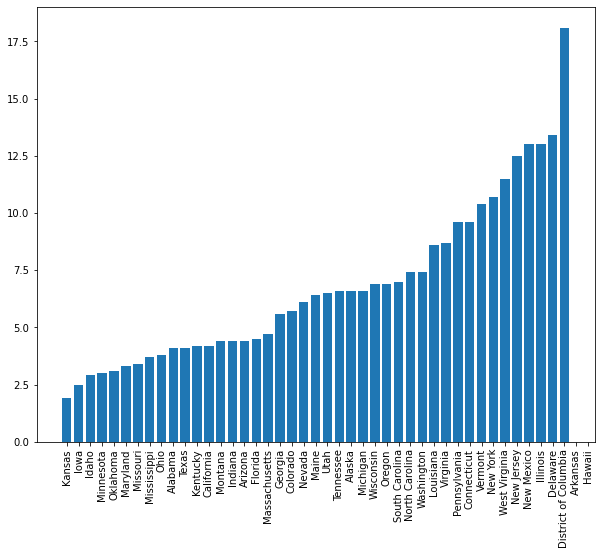

In [48]:
CM20b = CM20.sort_values(by=['Crude Rate'], ascending=True)
CM20b["Crude Rate"] = pd.to_numeric(CM20b["Crude Rate"], downcast="float")
CM20b = CM20b.sort_values(by=['Crude Rate'], ascending=True)

plt.figure(figsize=(10, 8))
plt.scatter(CM20["State"], CM20['Crude Rate'].astype(float))
plt.xticks(rotation=90)

plt.figure(figsize=(10, 8))
plt.xticks(rotation=90)
plt.bar(CM20b["State"], CM20b['Crude Rate'].astype(float))

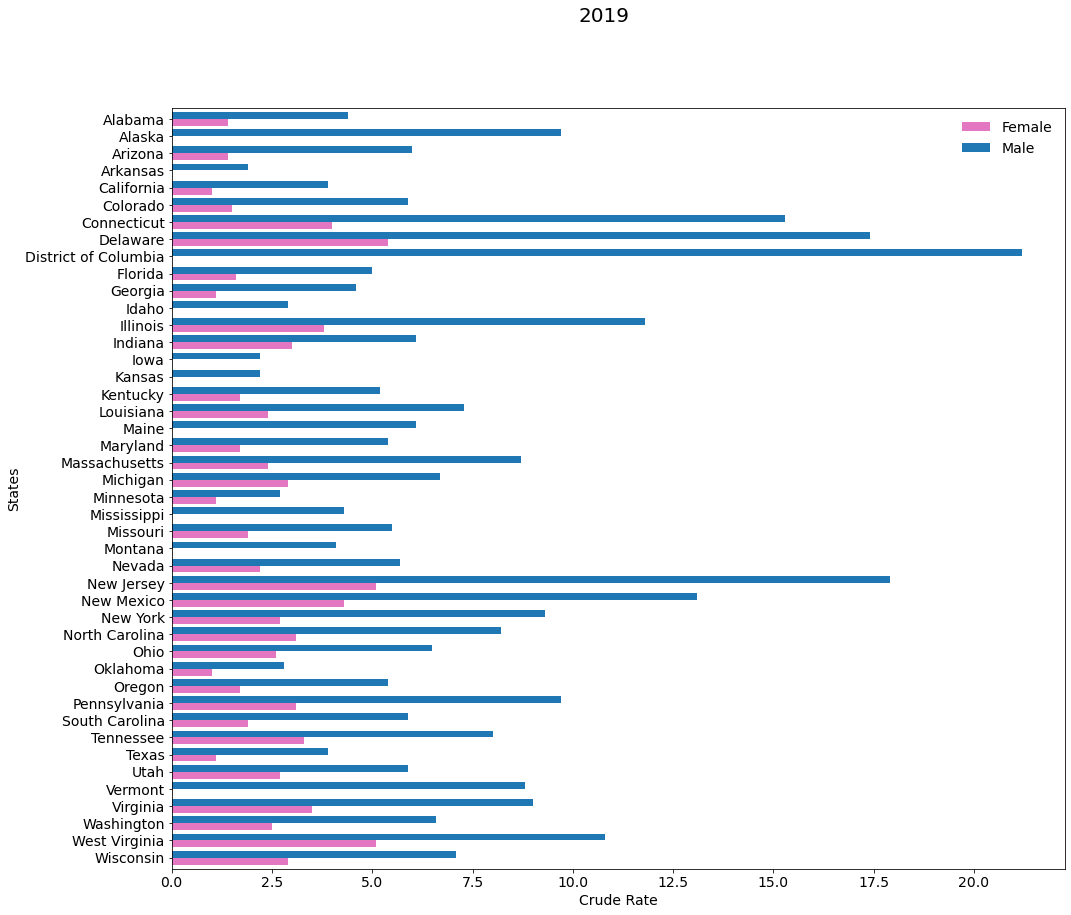

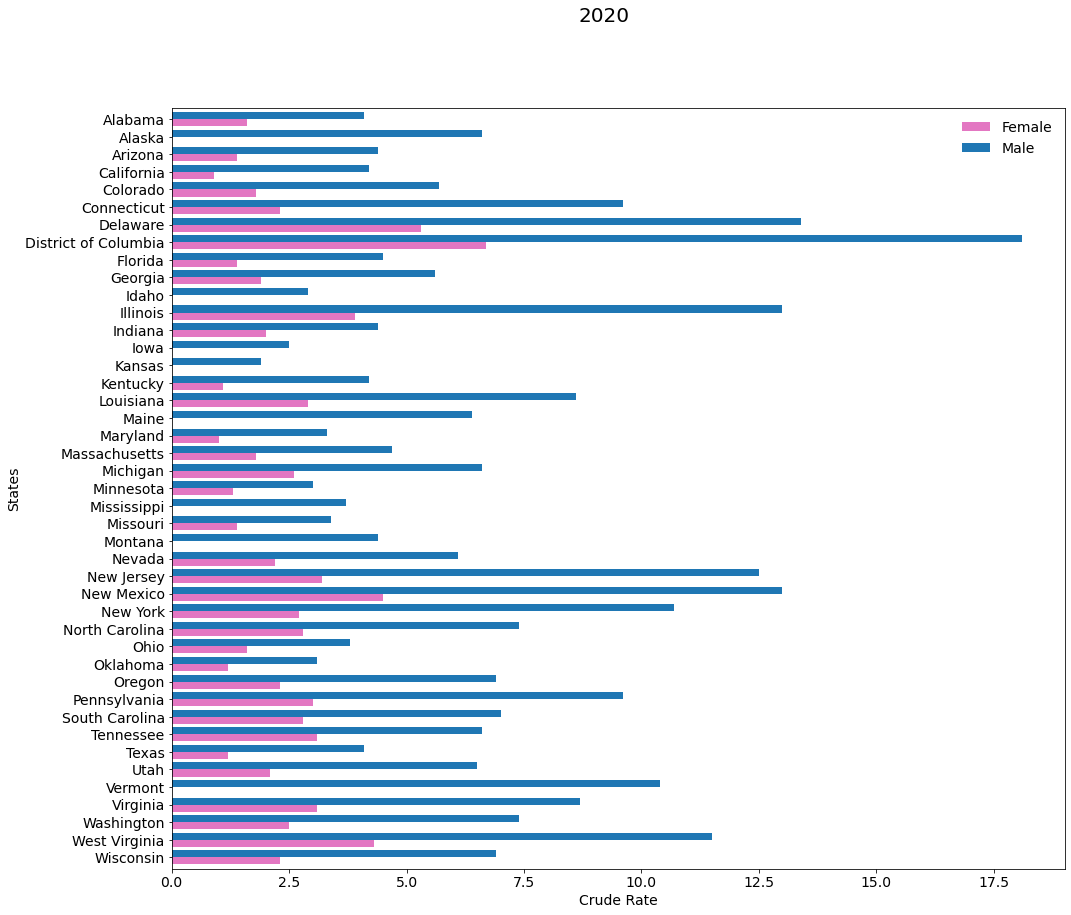

In [49]:
left19 = pd.DataFrame({"States": CF19["State"].astype(str), "Female": CF19["Crude Rate"].astype(float)})
right19 = pd.DataFrame({"States": CM19["State"].astype(str), "Male": CM19["Crude Rate"].astype(float)})

result19 = pd.merge(left19, right19, on = "States")
result219 = pd.merge(left19, right19, how = 'right')
result19 = result19.dropna(thresh=2)

left20 = pd.DataFrame({"States": CF20["State"].astype(str), "Female": CF20["Crude Rate"].astype(float)})
right20 = pd.DataFrame({"States": CM20["State"].astype(str), "Male": CM20["Crude Rate"].astype(float)})

result20 = pd.merge(left20, right20, on = "States")
result220 = pd.merge(left20, right20, how = 'right')
result20= result20.dropna(thresh=2)

df19 = pd.DataFrame(result19.loc[::-1])
df19.index = df19['States']
df19.plot(kind='barh', figsize=(16, 14),  color={"Female": "tab:pink", "Male": "tab:blue"}, width = 0.8, 
         fontsize=14)
plt.suptitle('2019', fontsize = 20)
plt.xlabel('Crude Rate', fontsize = 14)
plt.ylabel('States', fontsize = 14)
plt.legend(framealpha=0.0, fontsize = 14)
#plt.yticks(fontsize=14)
#plt.xticks(fontsize=14)
plt.savefig('T40.1_FM2019.svg')

df20 = pd.DataFrame(result20.loc[::-1])
df20.index = df20['States']
df20.plot(kind='barh', figsize=(16, 14),  color={"Female": "tab:pink", "Male": "tab:blue"}, width = 0.8, 
         fontsize=14)
plt.suptitle('2020', fontsize = 20)
plt.xlabel('Crude Rate', fontsize = 14)
plt.ylabel('States', fontsize = 14)
plt.legend(framealpha=0.0, fontsize = 14)
plt.savefig('T40.1_FM2020.svg')


(0.0, 90.0)

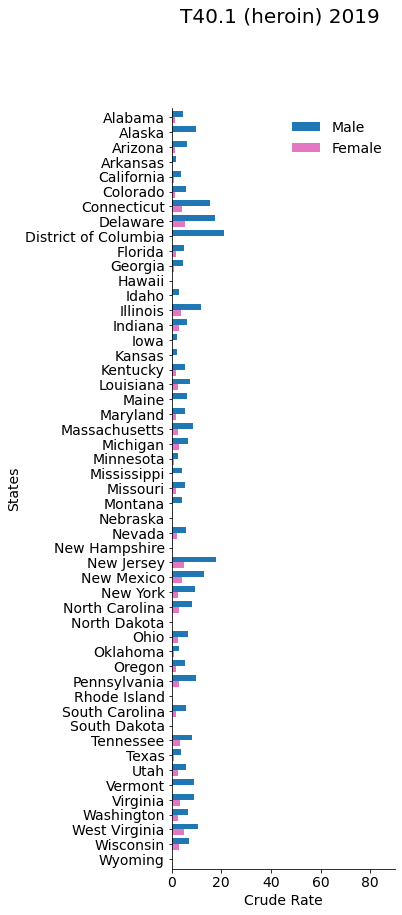

In [50]:
left19 = pd.DataFrame({"States": CF19["State"].astype(str), "Female": CF19["Crude Rate"].astype(float)})
right19 = pd.DataFrame({"States": CM19["State"].astype(str), "Male": CM19["Crude Rate"].astype(float)})

result19 = pd.merge(left19, right19, on = "States")
result219 = pd.merge(left19, right19, how = 'right')

left20 = pd.DataFrame({"States": CF20["State"].astype(str), "Female": CF20["Crude Rate"].astype(float)})
right20 = pd.DataFrame({"States": CM20["State"].astype(str), "Male": CM20["Crude Rate"].astype(float)})

result20 = pd.merge(left20, right20, on = "States")
result220 = pd.merge(left20, right20, how = 'right')

df19 = pd.DataFrame(result19.loc[::-1])
df19.index = df19['States']
ax = df19.plot(kind='barh', figsize=(4, 14),  color={"Female": "tab:pink", "Male": "tab:blue"}, width = 0.8, 
         fontsize=14)
plt.suptitle('T40.1 (heroin) 2019', fontsize = 20)
plt.xlabel('Crude Rate', fontsize = 14)
plt.ylabel('States', fontsize = 14)
handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels),framealpha=0.0, fontsize = 14)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
plt.xlim((0,90))
#plt.savefig('T40.1_2019.svg')


(0.0, 90.0)

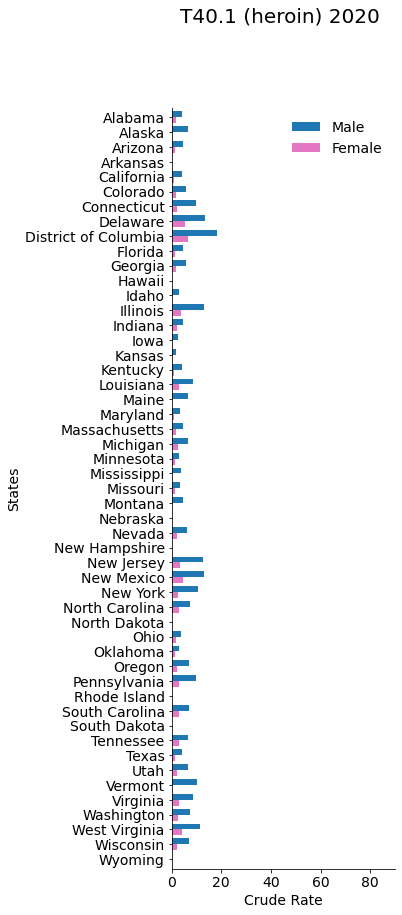

In [51]:
df20 = pd.DataFrame(result20.loc[::-1])
df20.index = df20['States']
ax2 = df20.plot(kind='barh', figsize=(4, 14),  color={"Female": "tab:pink", "Male": "tab:blue"}, width = 0.8, 
         fontsize=14)
plt.suptitle('T40.1 (heroin) 2020', fontsize = 20)
plt.xlabel('Crude Rate', fontsize = 14)
plt.ylabel('States', fontsize = 14)
handles, labels = ax2.get_legend_handles_labels()
ax2.legend(reversed(handles), reversed(labels),framealpha=0.0, fontsize = 14)

ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['bottom'].set_visible(True)
ax2.spines['left'].set_visible(True)
plt.xlim((0,90))
#plt.savefig('T40.1_2020.svg')
